In [ ]:
#!/usr/bin/env python

from Crypto.Cipher import AES
from key import KEY
import os
import math

BLOCK_SIZE = 16
UMAX = int(math.pow(256, BLOCK_SIZE))


def to_bytes(n):
    s = hex(n)
    s_n = s[2:]
    if 'L' in s_n:
        s_n = s_n.replace('L', '')
    if len(s_n) % 2 != 0:
        s_n = '0' + s_n
    decoded = s_n.decode('hex')

    pad = (len(decoded) % BLOCK_SIZE)
    if pad != 0: 
        decoded = "\0" * (BLOCK_SIZE - pad) + decoded
    return decoded


def remove_line(s):
    # returns the header line, and the rest of the file
    return s[:s.index('\n') + 1], s[s.index('\n')+1:]


def parse_header_ppm(f):
    data = f.read()

    header = ""

    for i in range(3):
        header_i, data = remove_line(data)
        header += header_i

    return header, data
        

def pad(pt):
    padding = BLOCK_SIZE - len(pt) % BLOCK_SIZE
    return pt + (chr(padding) * padding)


def aes_abc_encrypt(pt):
    cipher = AES.new(KEY, AES.MODE_ECB)
    ct = cipher.encrypt(pad(pt))

    blocks = [ct[i * BLOCK_SIZE:(i+1) * BLOCK_SIZE] for i in range(len(ct) / BLOCK_SIZE)]
    iv = os.urandom(16)
    blocks.insert(0, iv)
    
    for i in range(len(blocks) - 1):
        prev_blk = int(blocks[i].encode('hex'), 16)
        curr_blk = int(blocks[i+1].encode('hex'), 16)

        n_curr_blk = (prev_blk + curr_blk) % UMAX
        blocks[i+1] = to_bytes(n_curr_blk)

    ct_abc = "".join(blocks)
 
    return iv, ct_abc, ct


if __name__=="__main__":
    with open('flag.ppm', 'rb') as f:
        header, data = parse_header_ppm(f)
    
    iv, c_img, ct = aes_abc_encrypt(data)

    with open('body.enc.ppm', 'wb') as fw:
        fw.write(header)
        fw.write(c_img)


In [13]:
import os
import math
import binascii


BLOCK_SIZE = 16
UMAX = int(math.pow(256, BLOCK_SIZE))


def remove_line(s):
        # returns the header line, and the rest of the file
        return s[:s.index(b'\n') + 1], s[s.index(b'\n')+1:]


def parse_header_ppm(f):
        data = f.read()


        header = b""


        for i in range(3):
                header_i, data = remove_line(data)
                header += header_i


        return header, data


f = open(r'C:\Users\Admin\Downloads\body.enc.ppm', 'rb')
header, ct = parse_header_ppm(f)


print(header)


blocks = [ct[i * BLOCK_SIZE:(i+1) * BLOCK_SIZE] for i in range(len(ct) // BLOCK_SIZE)]
for i in range(len(blocks) - 2, 0, -1):
        prev_blk = int(binascii.hexlify(blocks[i]), 16)
        curr_blk = int(binascii.hexlify(blocks[i+1]), 16)


        n_curr_blk = (curr_blk - prev_blk) % UMAX
        blocks[i + 1] = binascii.unhexlify("{:032x}".format(n_curr_blk))


n_ct = b"".join(blocks)


fw = open('out.ppm', 'wb')
fw.write(header)
fw.write(n_ct)


b'P6\n1895 820\n255\n'


4661728

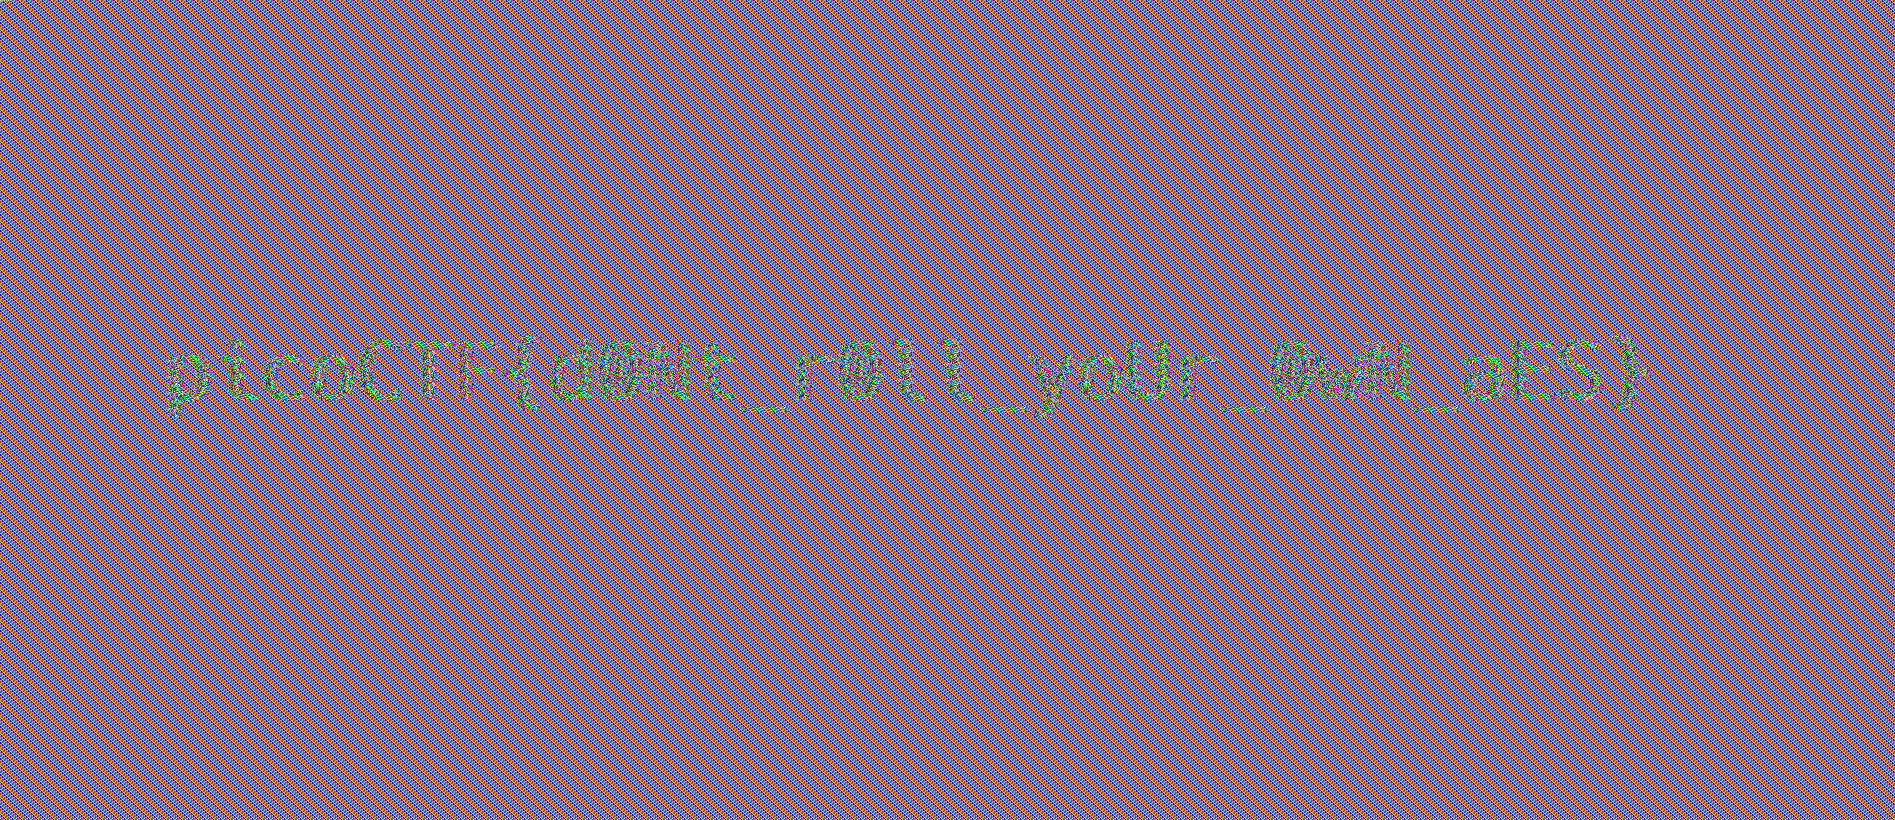

In [17]:
from PIL import Image

# Mở và hiển thị ảnh .ppm
img = Image.open('out.ppm')
img
